In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import random


In [2]:
def load_data(file_path):
    data = np.genfromtxt(file_path, delimiter='  ')
    return data


In [3]:
file_path = "/Users/harry/Downloads/kmeans_data.txt"
data = load_data(file_path)

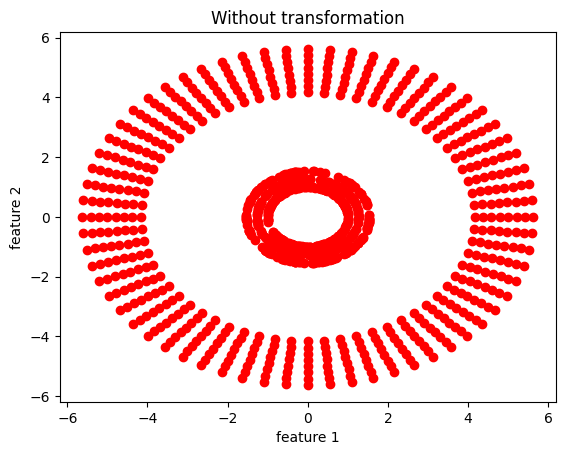

In [4]:
plt.scatter(data[:,0],data[:,1],color='red')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('Without transformation')
plt.show()

In [5]:
def k_means(data, k, max_iter=100, tol=1e-3):
    centroids = data[:2,:]
    
    for j in range(max_iter):
        
        labels = np.argmin(np.linalg.norm(data[:, np.newaxis] - centroids, axis=2), axis=1)
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
  
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        
        centroids = new_centroids
    
    return labels


In [6]:
def make_plot(data,labels,str):
    plt.scatter(data[labels == 0, 0], data[labels == 0, 1], c='blue', label='Cluster 0')
    plt.scatter(data[labels == 1, 0], data[labels == 1, 1], c='green', label='Cluster 1')
    plt.title(str)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()

    
    

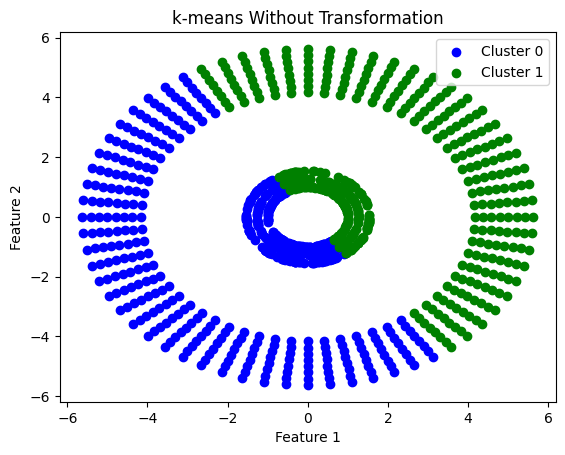

In [7]:
k = 2
labels= k_means(data,k)
title= 'Q2a_without_transformation'
make_plot(data,labels,'k-means Without Transformation')
filename = title+'.png'
plt.savefig(filename) 
plt.show()


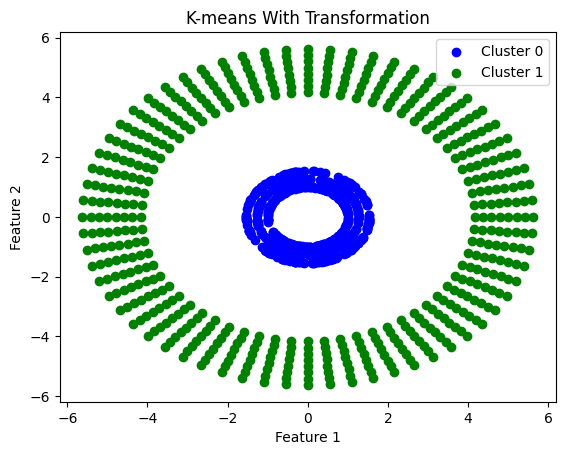

In [8]:
# Doing Feature Transformation: Taking the square of feature values
data2 = data.copy()
new_data = (np.sum(np.square(data2), axis=1)).reshape(-1,1)
new_labels = k_means(new_data,k)
title= 'Q2a_with_transformation'
make_plot(data2,new_labels,'K-means With Transformation')
filename = title+'.png'
plt.savefig(filename)
plt.show()

In [9]:
def cal_kernel(a,b):
    gamma =0.1
    return np.exp(-gamma*np.linalg.norm(a-b)**2)

In [10]:
def choose_numbers(arr):   
    index = random.randint(0, arr.shape[0]-1)
    return arr[index],index

In [11]:
def new_features(X,landmarks):
    list=[]
    for i in range(landmarks.shape[0]):
        list.append(cal_kernel(X,landmarks[i]))
        
    return np.array(list)

In [12]:
def generate_phi(X_train):
    L=1
    row = X_train.shape[0]
    col = 2
    phi_train= np.empty((row,col), dtype=float)
    landmarks,index = choose_numbers(X_train)
    for i in range(row):
        phi_train[i,:]= new_features(X_train[i], landmarks)

    return phi_train,index

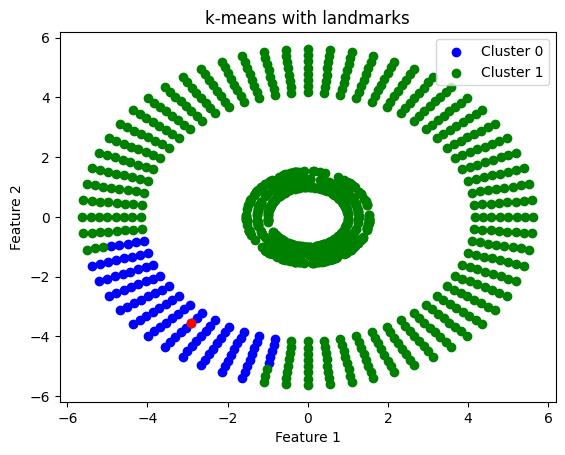

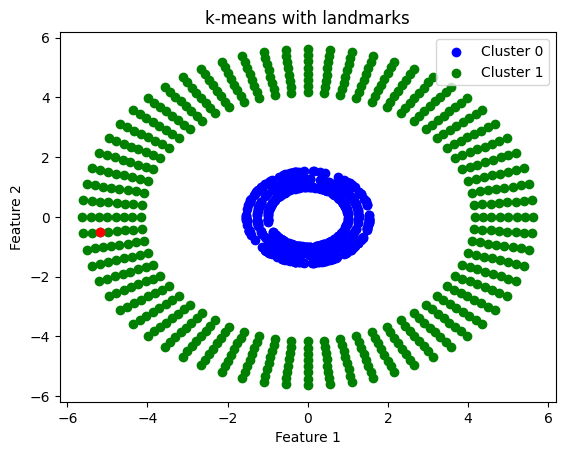

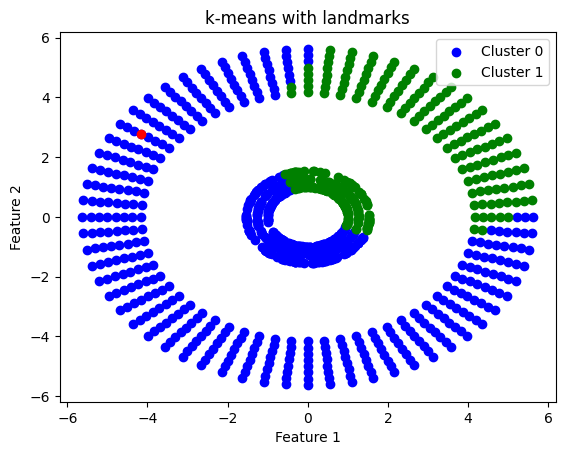

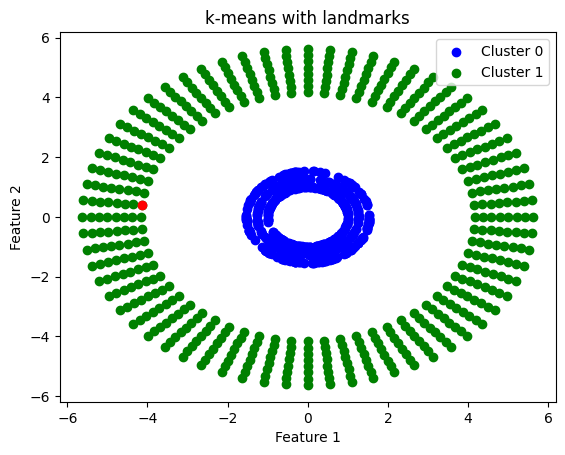

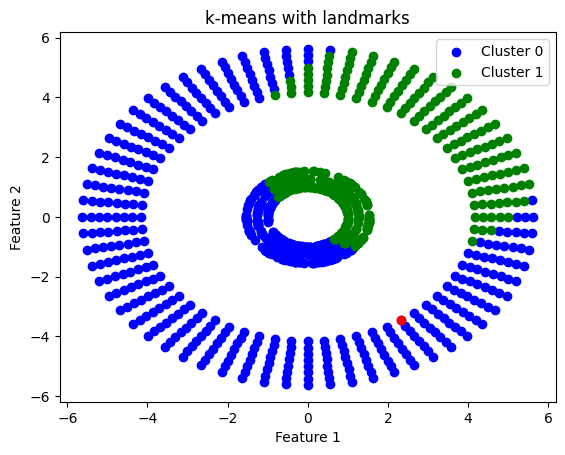

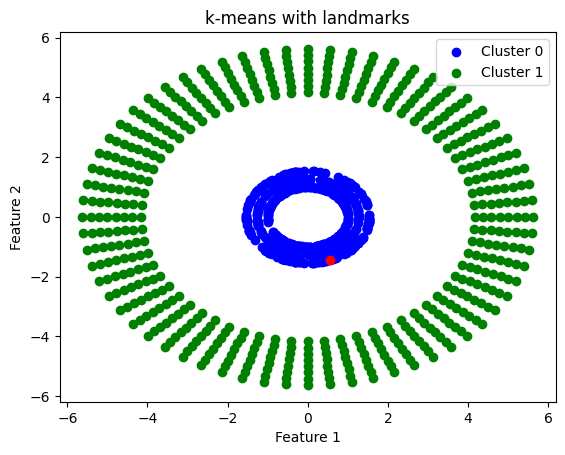

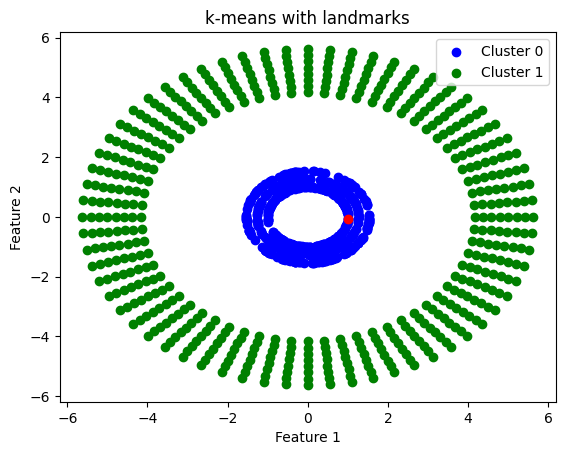

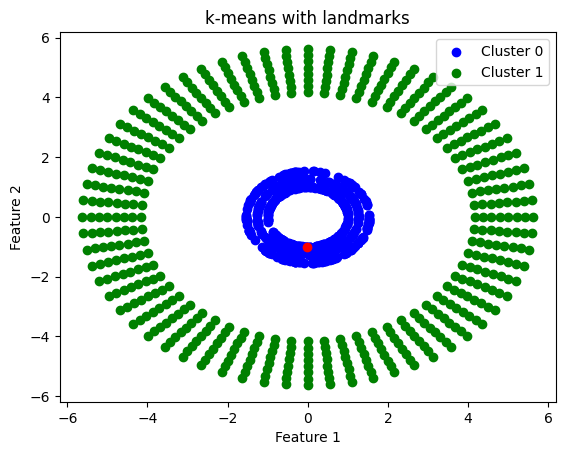

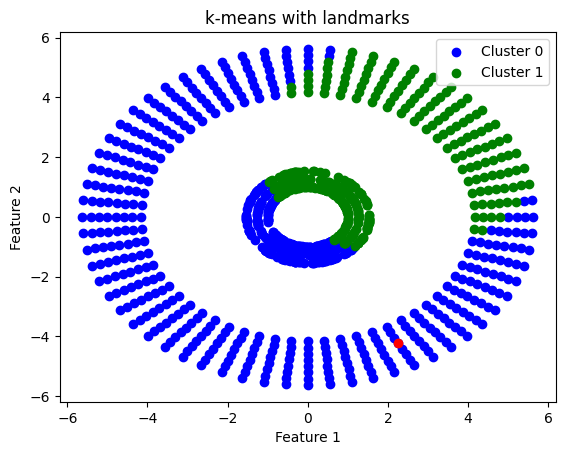

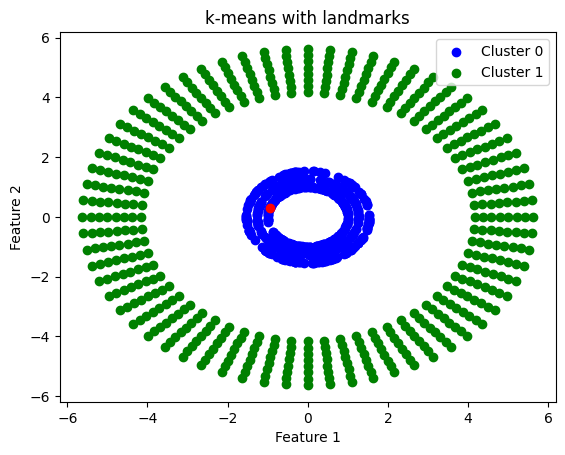

In [13]:
for i in range(10):
    phi_data,index = generate_phi(data)
    b_labels= k_means(phi_data,k)
    make_plot(data,b_labels,'k-means with landmarks')
    plt.scatter(data[index,0], data[index,1], color='red', marker='o')
    filename = 'Q2_b_0'+str(i)+'.png'
    plt.savefig(filename)
    plt.show()